In [1]:
import networkx as nx
import umap
import matplotlib.pyplot as plt
import matplotlib
import datetime
from dateutil.relativedelta import relativedelta
from whittaker_smooth import whittaker_smooth
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
frequent_subgraph = []
node_labels = []
edge_labels = []
suports = []
edge_weights = []
G = None
with open("graphs.txt") as file:
    for line in file:
        if (line.startswith("t")):
            if not(G is None):
                frequent_subgraph.append(G)
                node_labels.append(node_label)
                edge_labels.append(edge_label)
                edge_weights.append(edge_weight)
                suports.append(suport)
                nx.set_node_attributes(G, node_label, name="label")
                nx.set_edge_attributes(G, edge_label, name='label')
                nx.set_edge_attributes(G, edge_weight, name='crisp')
            G = nx.Graph()
            node_label = {}
            edge_label = {}
            edge_weight = {}
            suport = []
        if (line.startswith("v")):
            values = line.split(' ')
            G.add_node(int(values[1]))
            node_label[int(values[1])] = chr( 64 + int(values[2]))
        if (line.startswith("e")):
            values = line.split(' ')
            G.add_edge(int(values[1]), int(values[2]), weight=1)
            edge_weight[(int(values[1]), int(values[2]))] = int(values[3]) + 1
            if (values[3].strip() == '0'):
                edge_label[(int(values[1]), int(values[2]))] = 'Low'
            elif (values[3].strip() == '1'):
                edge_label[(int(values[1]), int(values[2]))] = 'Medium'
            else:
                edge_label[(int(values[1]), int(values[2]))] = 'High'
        if (line.startswith("x")):
            suport = [int(ele) for ele in line.replace("x ", "").split()]

In [7]:
chr( 64 + 1)

'A'

In [5]:
nx.get_node_attributes(frequent_subgraph[0], 'label')

{0: 'C',
 1: 'D',
 2: 'E',
 3: 'F',
 4: 'G',
 5: 'H',
 6: 'I',
 7: 'J',
 8: 'K',
 9: 'L',
 10: 'M',
 11: 'N',
 12: 'P',
 13: 'Q',
 14: 'R',
 15: 'S'}

In [4]:
frequent_subgraph[0].nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [3]:
frequent_subgraph[0].edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 2), (1, 3), (1, 5), (1, 7), (1, 8), (1, 10), (1, 11), (2, 3), (2, 4), (2, 5), (2, 7), (2, 8), (2, 10), (2, 11), (3, 4), (3, 5), (3, 7), (3, 8), (3, 10), (3, 11), (4, 4), (4, 5), (4, 6), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 5), (5, 6), (5, 7), (5, 8), (5, 10), (5, 11), (5, 12), (5, 15), (6, 6), (6, 11), (6, 12), (6, 13), (6, 14), (7, 8), (7, 9), (7, 10), (7, 11), (8, 10), (8, 11), (9, 11), (10, 11), (10, 12), (10, 15), (11, 11), (11, 12), (11, 13), (12, 12), (12, 13), (12, 14), (12, 15), (13, 13), (13, 15), (14, 15), (15, 15)])

In [13]:
def plot_graph(index, graphs=frequent_subgraph, node_labels=node_labels, edge_labels=edge_labels, suports=suports):
    plt.figure()  
    plt.title("Date: " + suports[index].strftime('%Y-%m'))
    pos = nx.circular_layout(frequent_subgraph[index])
    nx.draw(frequent_subgraph[index], pos, labels=node_labels[index], node_shape="s",bbox=dict(facecolor="orange", edgecolor='black', boxstyle='round,pad=0.2'))
    nx.draw_networkx_edge_labels(frequent_subgraph[index], pos, edge_labels=edge_labels[index], font_color='green', verticalalignment='top')
    print(nx.to_latex_raw(frequent_subgraph[index], pos, node_label=node_labels[index], edge_label=edge_labels[index], edge_label_options='above'))
    plt.show()

In [30]:
bi = 0
for i in range(len(frequent_subgraph)):
    if(nx.is_planar( frequent_subgraph[i])):
        bi = bi +1
    #print("Grafo {}, Bipartido {}".format(i, nx.is_bipartite( frequent_subgraph[i])))
bi/len(frequent_subgraph)

0.0

In [49]:
frequent_subgraph[0].nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [50]:
nx.get_node_attributes(G, "label")

{}

KeyError: 11

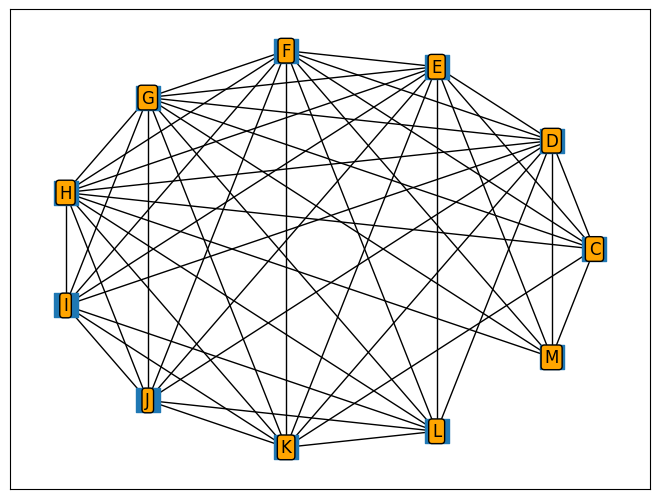

In [51]:
G = nx.make_max_clique_graph(frequent_subgraph[0])
pos = nx.circular_layout(G)
nx.draw(G, pos, labels=nx.get_node_attributes(frequent_subgraph[0], "label"), node_shape="s",bbox=dict(facecolor="orange", edgecolor='black', boxstyle='round,pad=0.2'))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(frequent_subgraph[0], "label"), font_color='green', verticalalignment='top')
#print(nx.to_latex_raw(frequent_subgraph[index], pos, node_label=node_labels[index], edge_label=edge_labels[index], edge_label_options='above'))
plt.show()

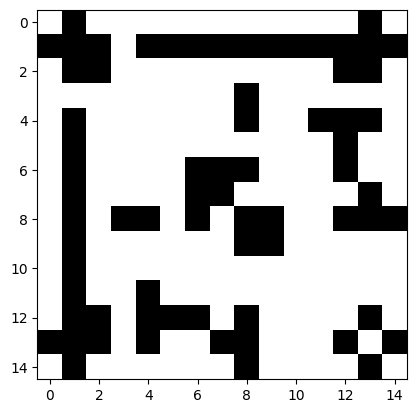

In [4]:
plt.gray()
plt.imshow(nx.adjacency_matrix(frequent_subgraph[5]).toarray())

In [5]:
#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis


y = np.array([nx.degree_pearson_correlation_coefficient(g,weight="weight") for g in frequent_subgraph])
#fig.suptitle("Assortativity", fontsize=14, fontweight='bold')
ax.plot(suports, whittaker_smooth(y, 2), 'k', label="Tendency")
ax.plot(suports,y,'ko',marker='x')
ax.legend(loc="upper right")
ax.set_ylabel('Assortativity')
fig.autofmt_xdate(rotation=45)
#plt.show
#plt.savefig('Assortativity.pgf')

fig.savefig('assorativity.png')   # save the figure to file
plt.close(fig)    # close the figure window


C:\Users\pb003283\AppData\Local\Temp\3\ipykernel_9688\1651773851.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(suports,y,'ko',marker='x')


In [6]:
import copy
#from karateclub import Graph2Vec, IGE, NetLSD, SF
from SF import SF
model = SF(128,42)
model.fit(copy.deepcopy(frequent_subgraph) )
emb = model.get_embedding()

D:\repositorios\alvaras\freq_subgraph\Estimator.py:66: UserWarning: Please do be advised that the graph you have provided does not contain (some) edges in the main diagonal, for instance the self-loop constitued of (1, 1). These selfloops are necessary to ensure that the graph is traversable, and for this reason we create a copy of the graph and add therein the missing edges. Since we are creating a copy, this will immediately duplicate the memory requirements. To avoid this double allocation, you can provide the graph with the selfloops.
  warnings.warn(
D:\repositorios\alvaras\freq_subgraph\Estimator.py:66: UserWarning: Please do be advised that the graph you have provided does not contain (some) edges in the main diagonal, for instance the self-loop constitued of (5, 5). These selfloops are necessary to ensure that the graph is traversable, and for this reason we create a copy of the graph and add therein the missing edges. Since we are creating a copy, this will immediately duplica

In [7]:
np.random.seed(42)
reducer = umap.UMAP(a=None, angular_rp_forest=True, b=None,
     force_approximation_algorithm=True, init='spectral', learning_rate=0.001,
     local_connectivity=1.0, low_memory=False, metric='manhattan',
     metric_kwds=None, min_dist=0.001, n_components=1, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='manhattan',
     output_metric_kwds=None, random_state=73, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)
embedding = reducer.fit_transform( StandardScaler().fit_transform(emb))

D:\Python\alvaras\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Python\alvaras\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [8]:

fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis


y = embedding[:, 0]
#fig.suptitle("Topological Time Envolving", fontsize=14, fontweight='bold')
ax.plot(suports, whittaker_smooth(y, 20), 'k', label="Tendency")
ax.plot(suports,y,marker='x', linestyle='--', color='k')
ax.legend(loc="upper right")
fig.autofmt_xdate(rotation=45)
#plt.show
#plt.savefig('Assortativity.pgf')
ax.set_ylabel("1D Embedding Space")

fig.savefig('time_struct.png')   # save the figure to file
plt.close(fig)    # close the figure window

In [9]:
np.where(embedding[:, 0] > 6)

(array([ 0,  1,  4,  6,  7,  9, 13, 18, 20, 21, 23, 25, 26, 27, 29, 30, 31,
        32, 33, 35, 39, 42, 43, 45]),)

  \begin{tikzpicture}
      \draw
        (1.0, 0.0) node (0){A}
        (0.932, 0.361) node (1){B}
        (0.739, 0.674) node (2){C}
        (0.446, 0.895) node (3){E}
        (0.092, 0.996) node (4){F}
        (-0.274, 0.962) node (5){G}
        (-0.603, 0.798) node (6){H}
        (-0.85, 0.526) node (7){I}
        (-0.983, 0.184) node (8){J}
        (-0.983, -0.184) node (9){K}
        (-0.85, -0.526) node (10){L}
        (-0.603, -0.798) node (11){M}
        (-0.274, -0.962) node (12){N}
        (0.092, -0.996) node (13){P}
        (0.446, -0.895) node (14){Q}
        (0.739, -0.674) node (15){R}
        (0.932, -0.361) node (16){S};
      \begin{scope}[-]
        \draw (0) to node[] {Low} (2);
        \draw (0) to node[] {Low} (5);
        \draw (0) to node[] {Low} (7);
        \draw (0) to node[] {Low} (11);
        \draw (0) to node[] {Low} (12);
        \draw (1) to node[] {Low} (2);
        \draw (1) to node[] {Low} (3);
        \draw (1) to node[] {Low} (4);
        \draw (1

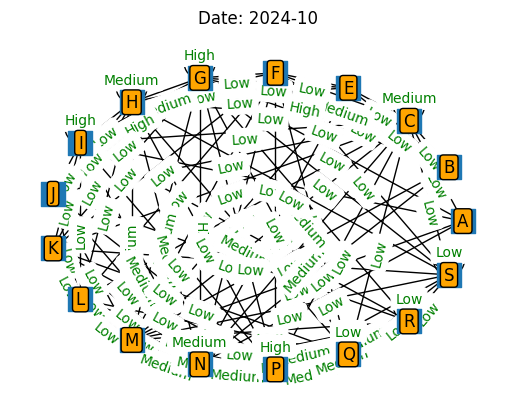

In [10]:
plot_graph(45)